In [1]:
import numpy as np
import prep
import peaks_detection
import data_plot
import matplotlib.pyplot as plt
import biosppy
import seaborn as sns

In [2]:
filename = 'data_2/normokapnia/e[3]_[n]_[01].csv'
signal_name = 'abp_finger_mm_hg_[abp_finger_mm_Hg_]'
alternative_signal_name = 'abp_finger[abp_finger]'

# style settings
sns.set(style='whitegrid', rc={'axes.facecolor': '#EFF2F7'})

In [3]:
try:
    df = prep.read_data(filename, signal_name, ';')
except KeyError:
    df = prep.read_data(filename, alternative_signal_name, ';')
df.interpolate(method='linear', inplace=True)

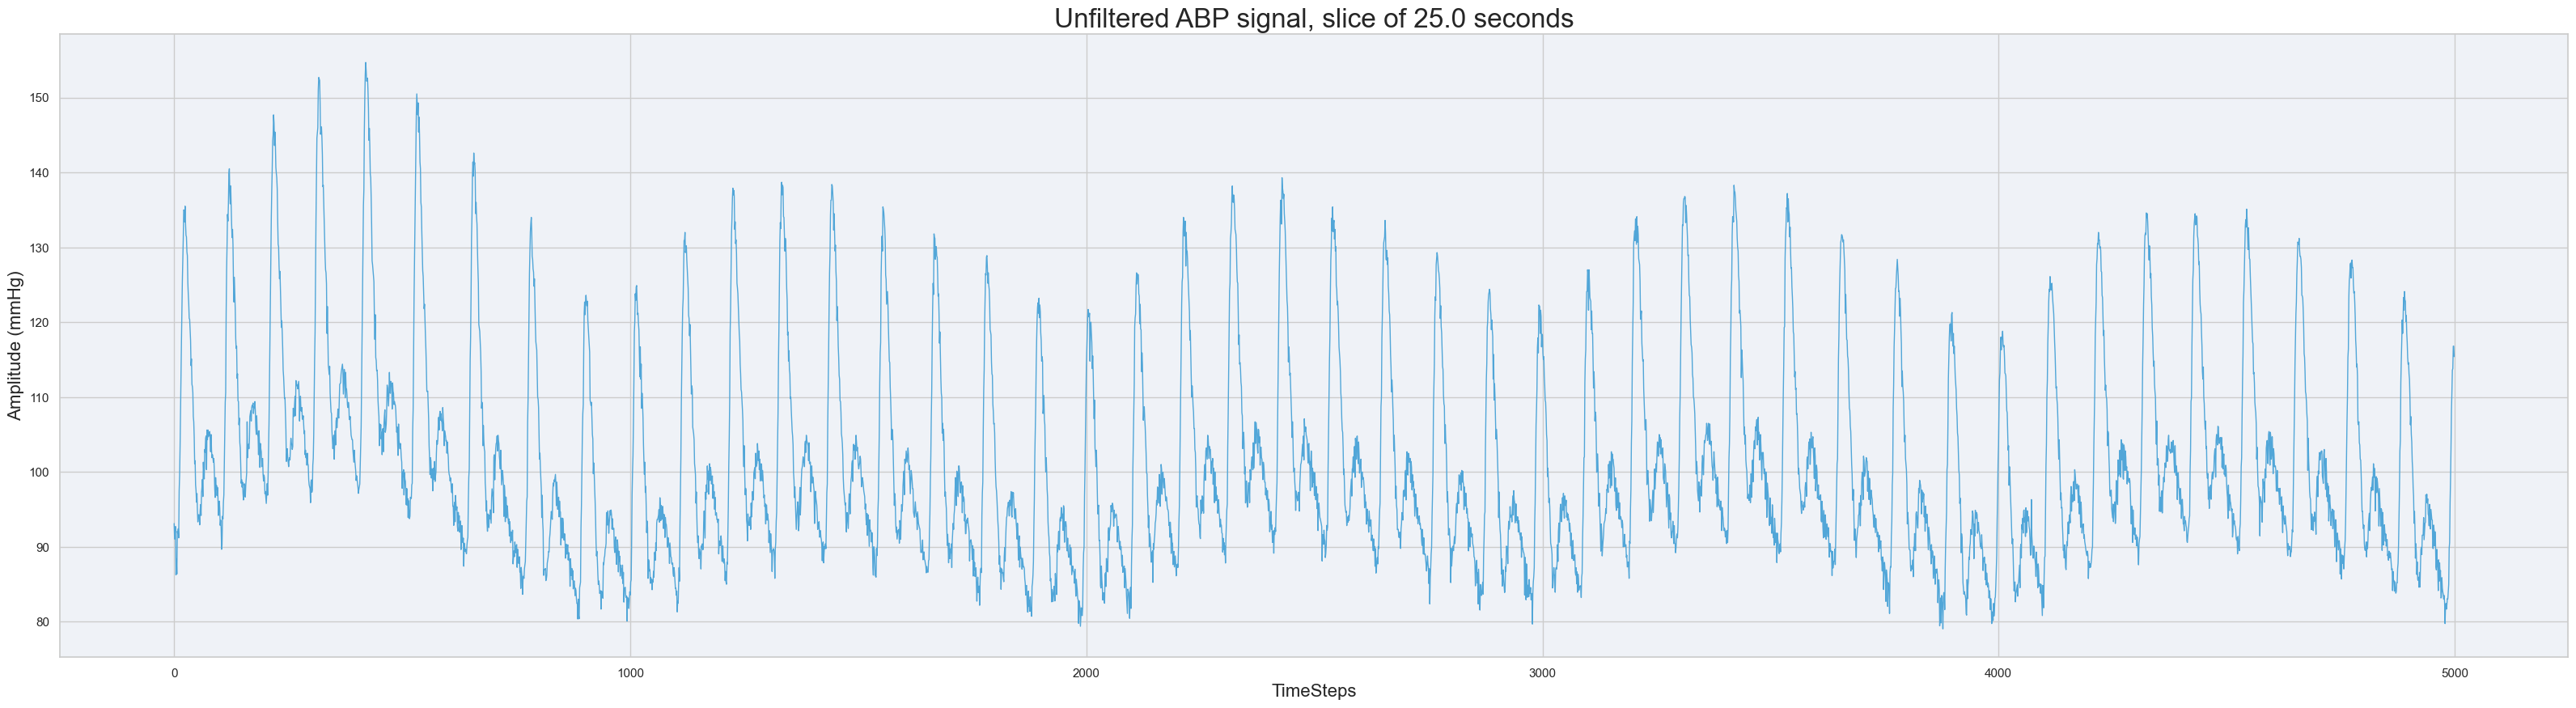

In [4]:
data_plot.plot_signal(df, 0, 5000, 200, False)

In [5]:
# applaying biosppy filter
filtered_abp = biosppy.signals.abp.abp(df["Values"], sampling_rate=200, show=False)[1]
df["Values"] = filtered_abp

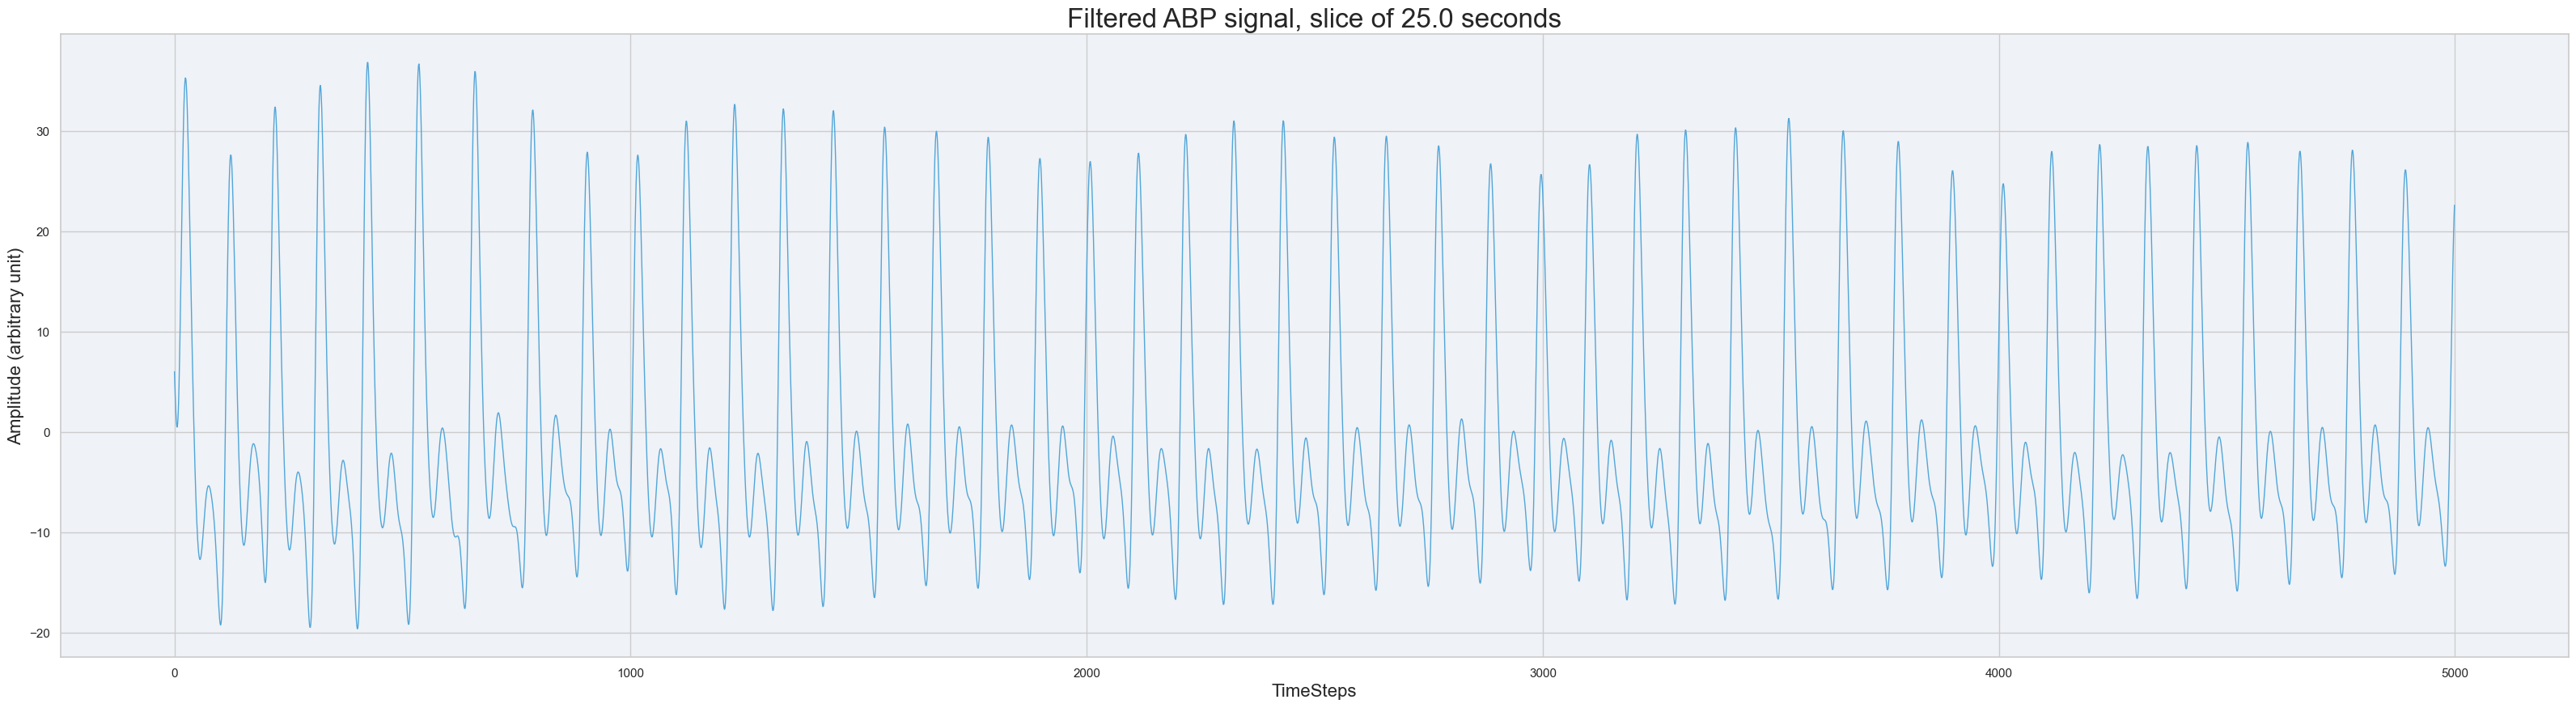

In [6]:
data_plot.plot_signal(df, 0, 5000, 200, True)

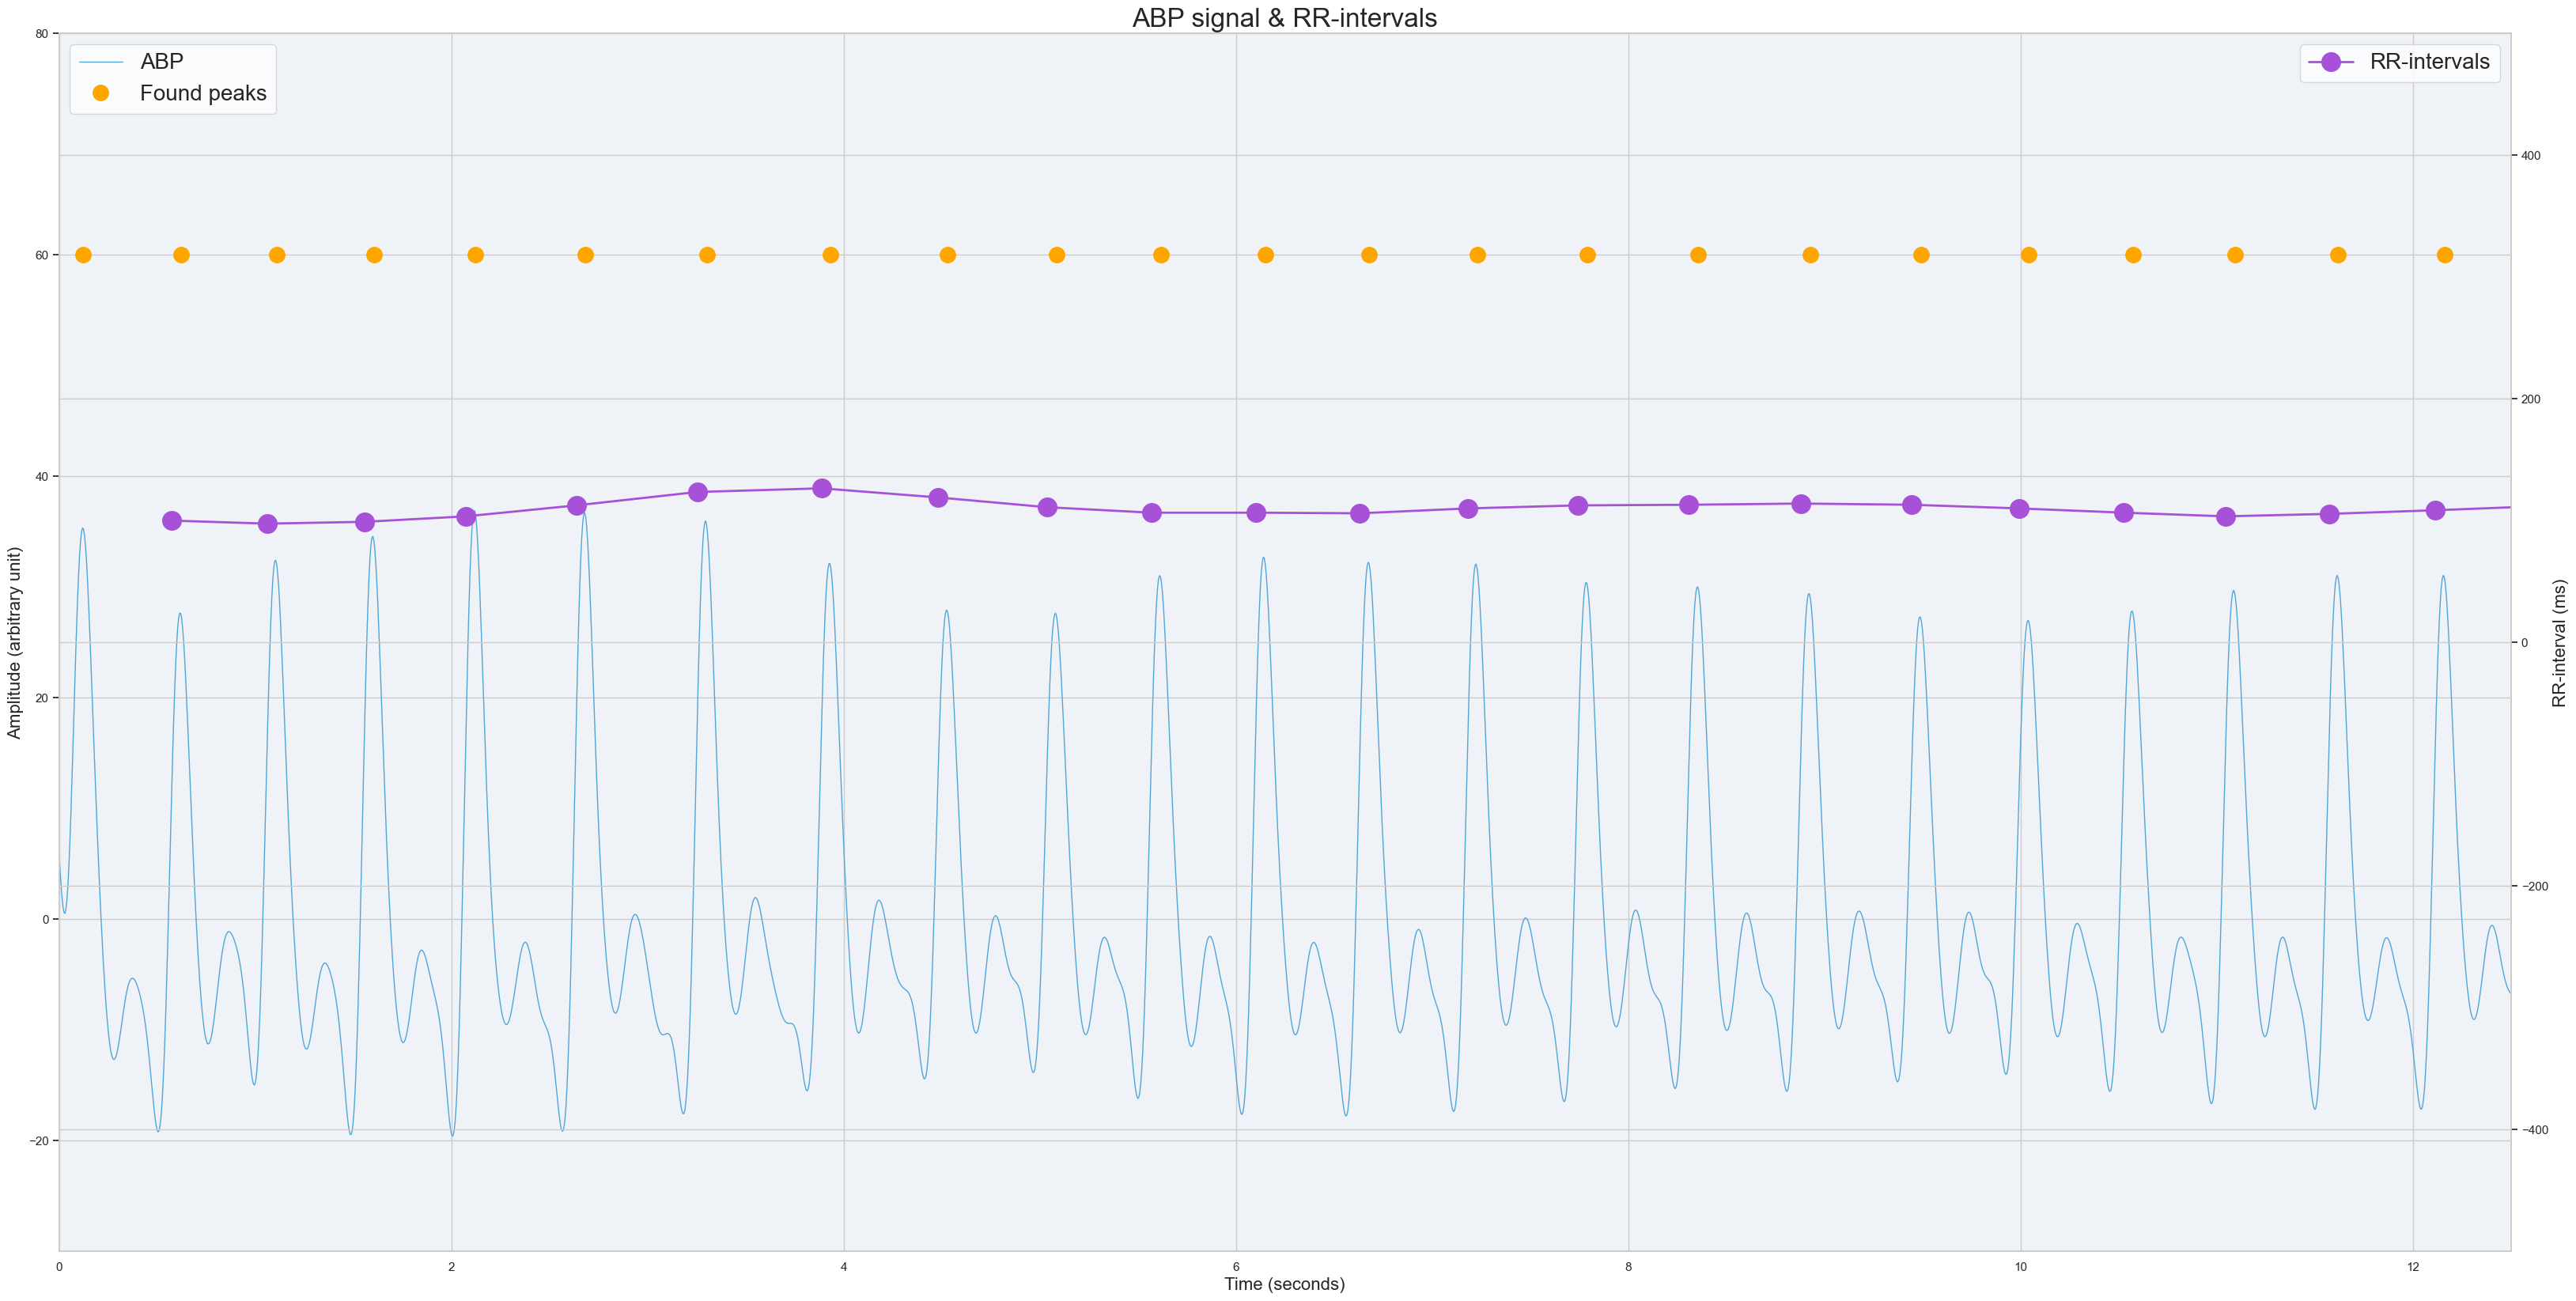

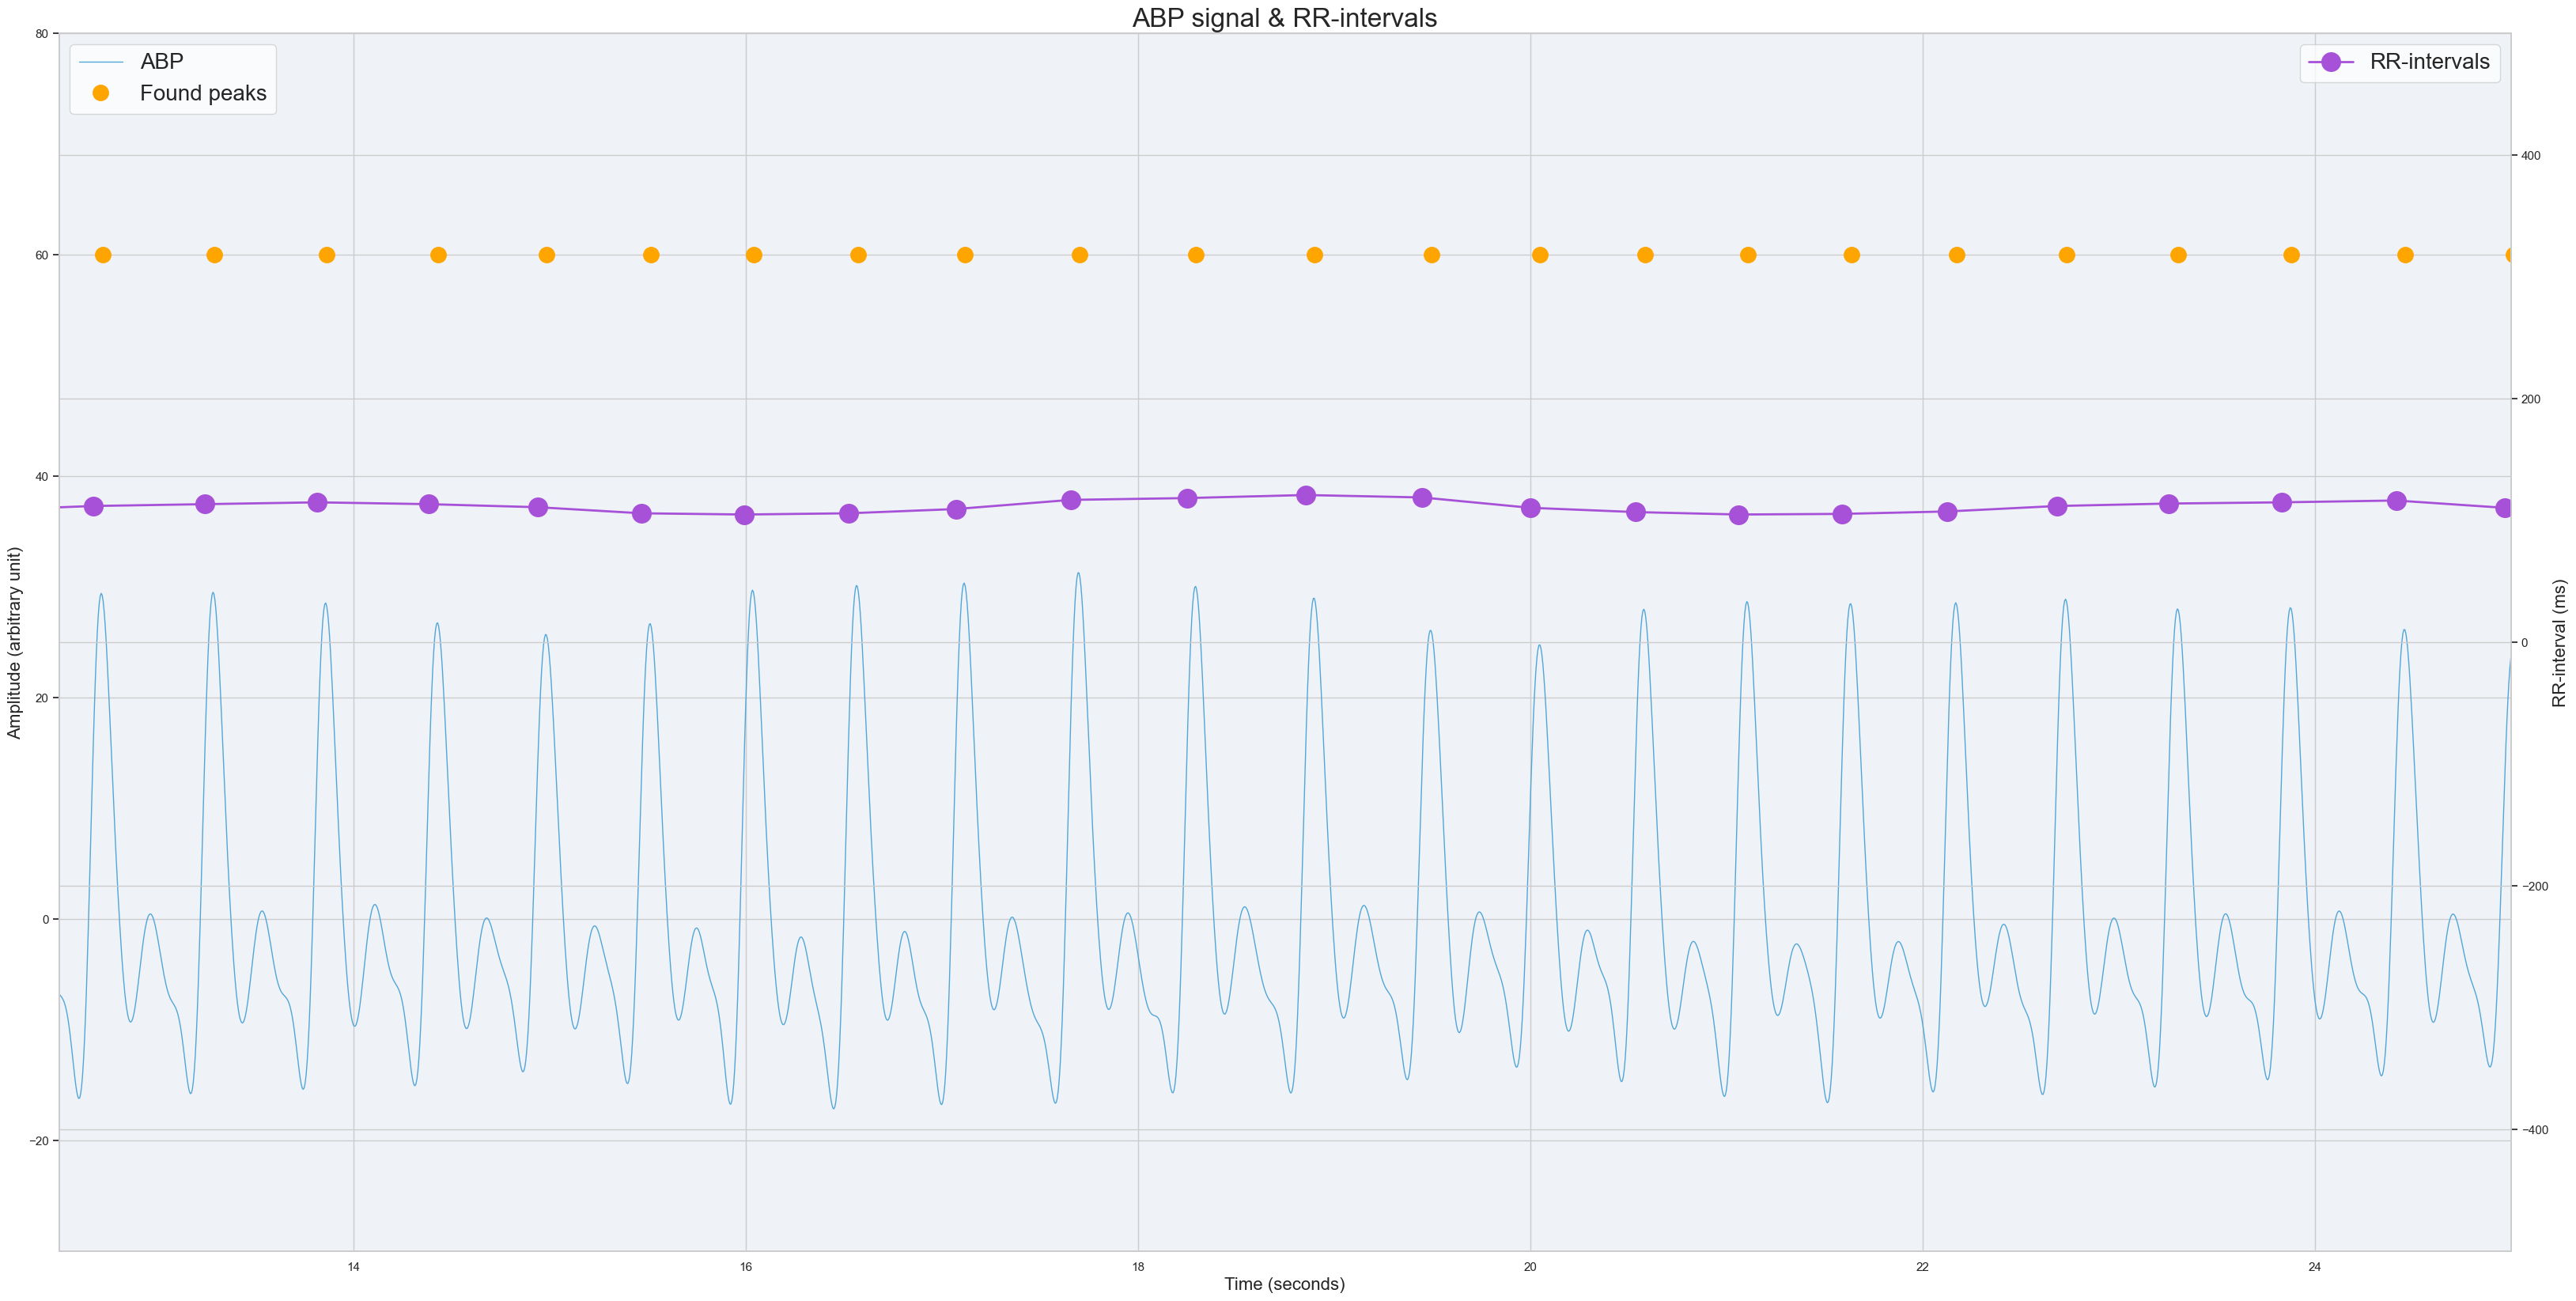

In [7]:
peaks_detection.plot_abp_vs_rr_intervals(df, 0, 5000, 2)

In [8]:
rr = peaks_detection.rr_intervals(df["Values"], sampling_rate=200)

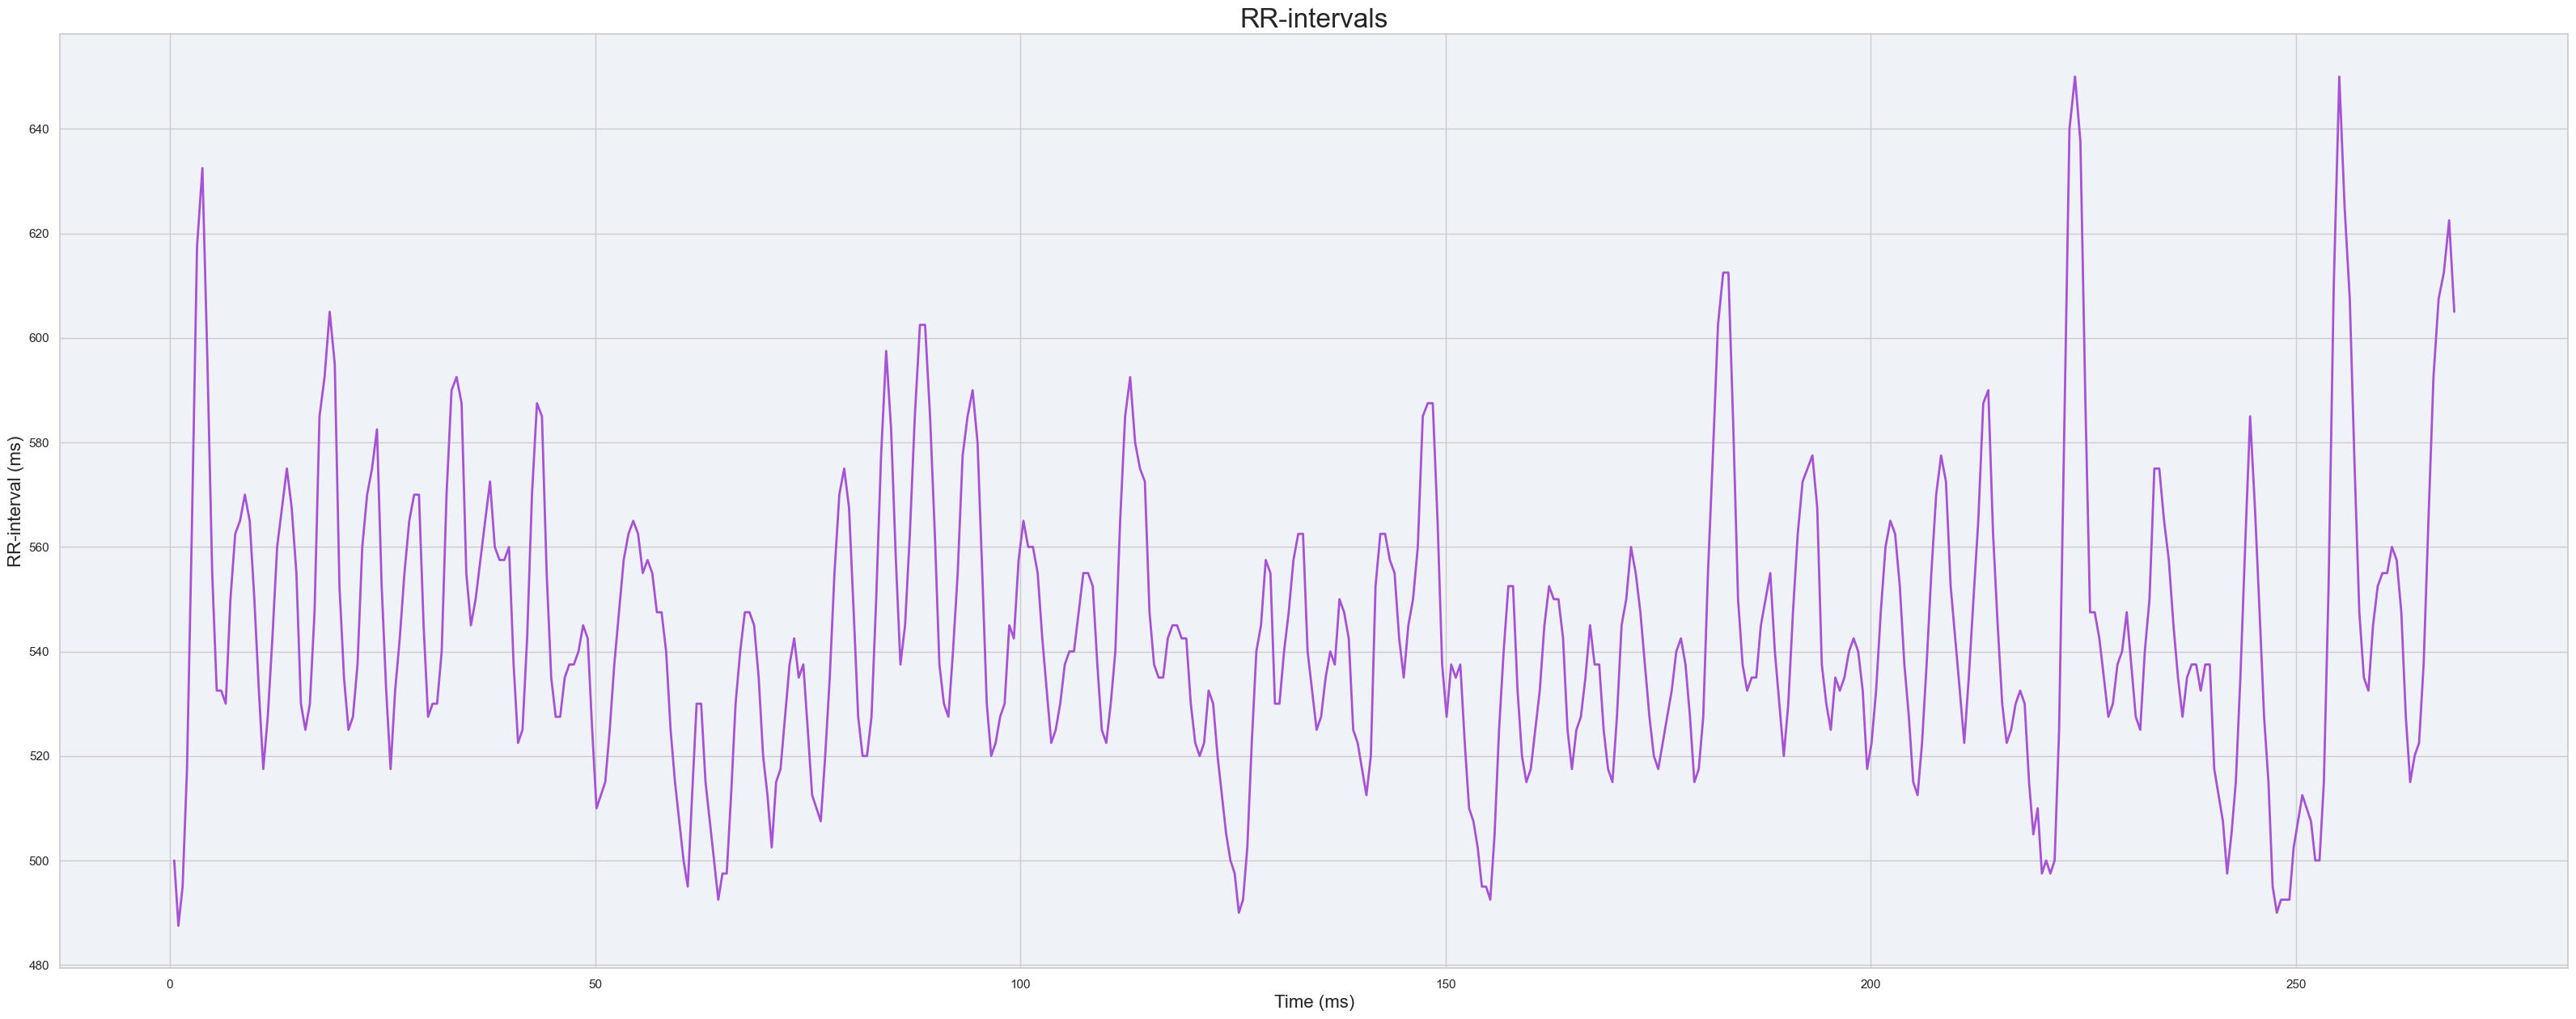

In [9]:
peaks_detection.plot_rr_intervals(rr, True)

In [10]:
prsa_ac, ac_anchors, ac_anchors_neighbours = data_plot.calculate(rr, 3, "AC", 0.2)

In [11]:
prsa_dc, dc_anchors, dc_anchors_neighbours = data_plot.calculate(rr, 3, "DC", 0.2)

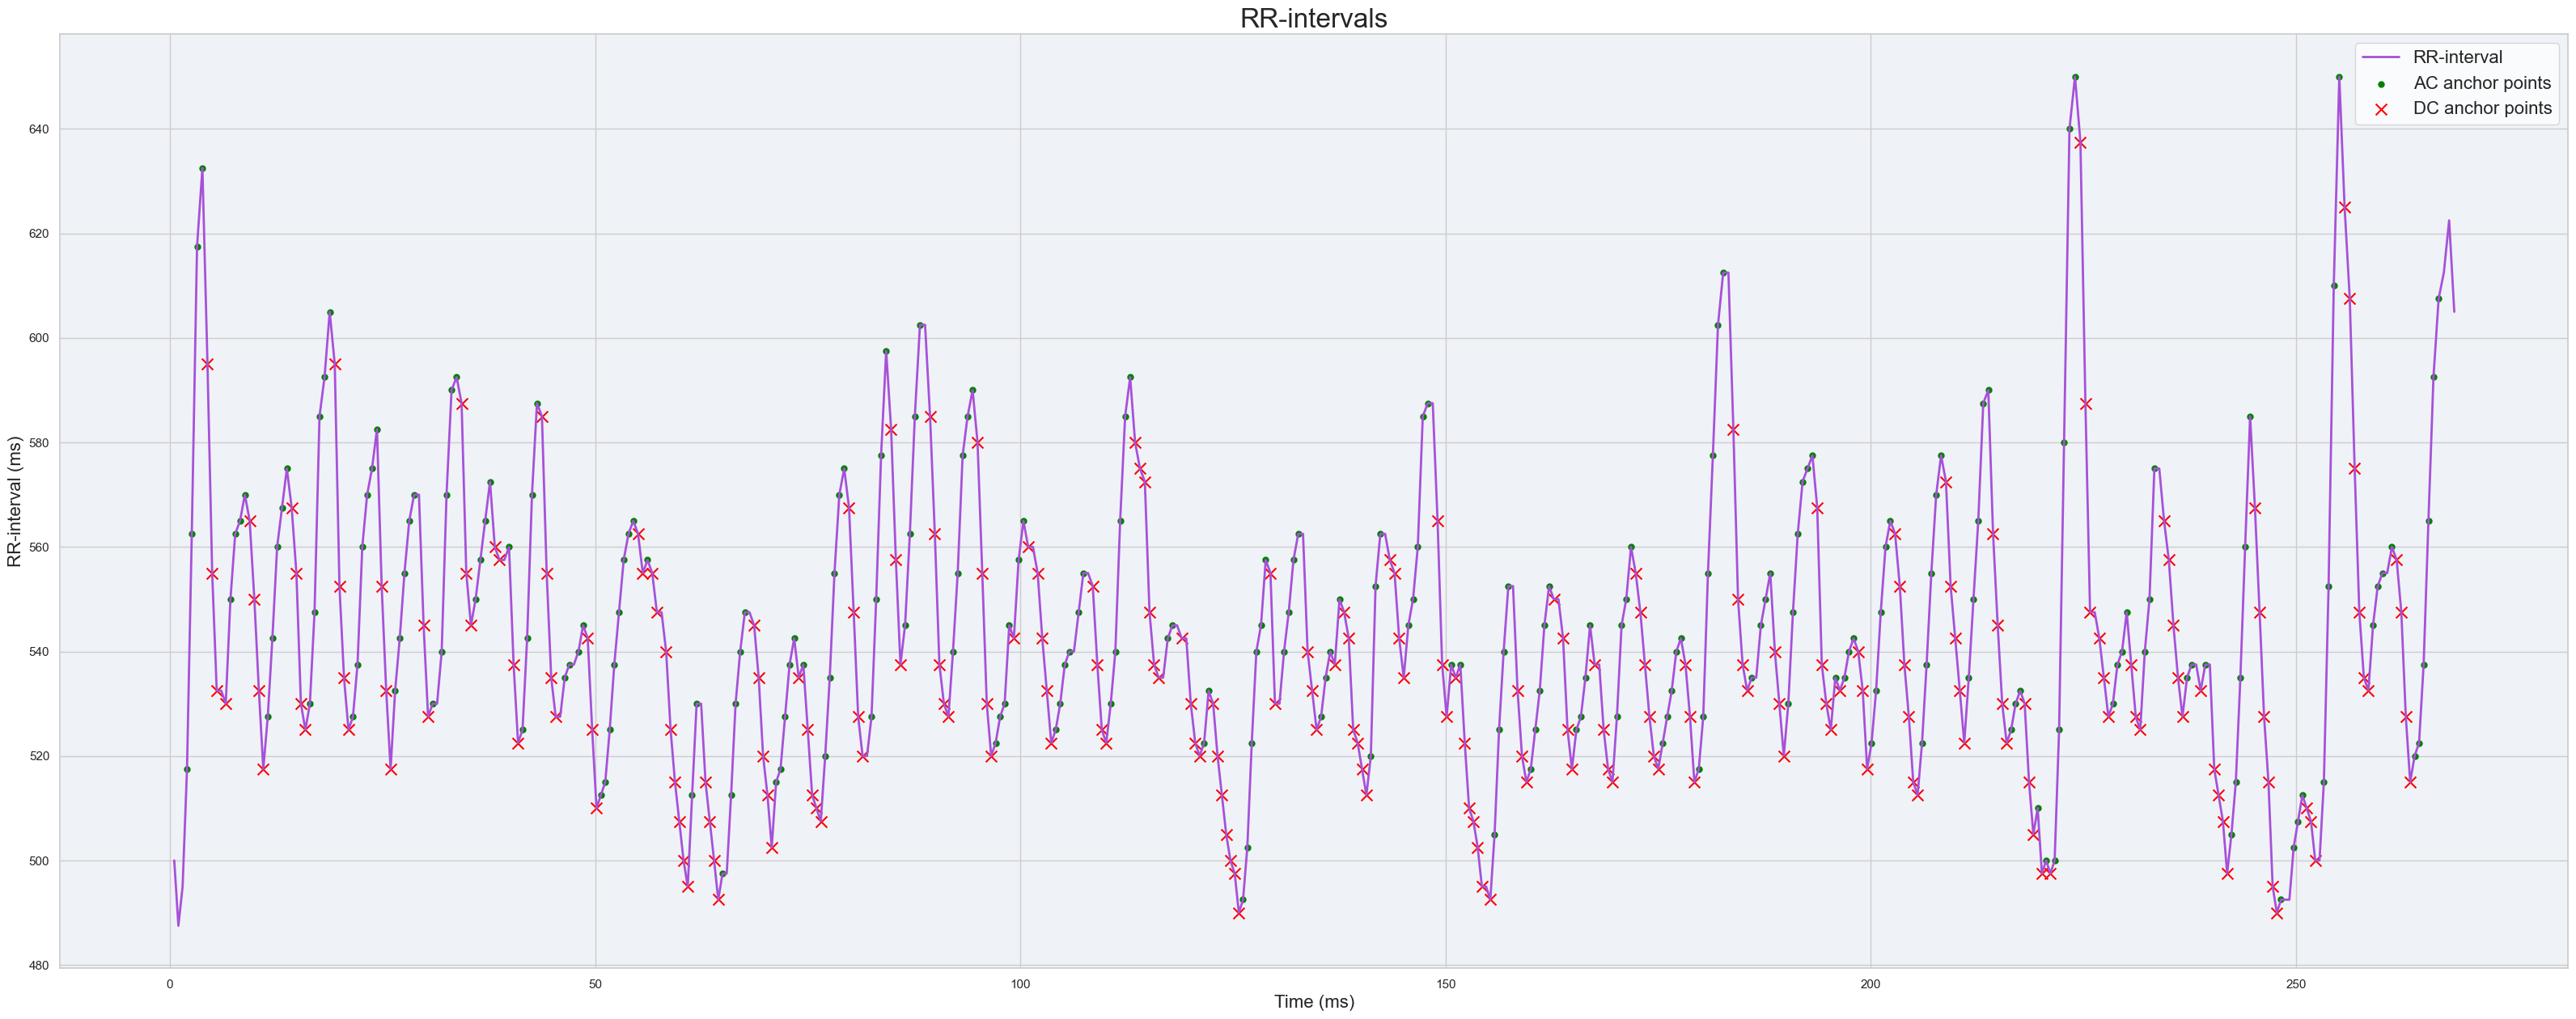

In [12]:
data_plot.plot_with_anchors(rr, ac_anchors, dc_anchors)

In [16]:
print(prsa_ac)

[527.84482759 530.09698276 537.64008621 549.22413793 556.84267241
 558.95474138 555.54956897]


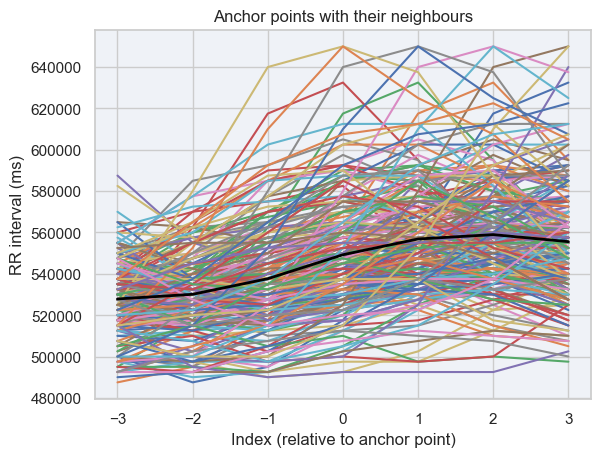

In [17]:
data_plot.plot_all_anchors_with_neighbours(ac_anchors_neighbours, prsa_ac*1000, 3)

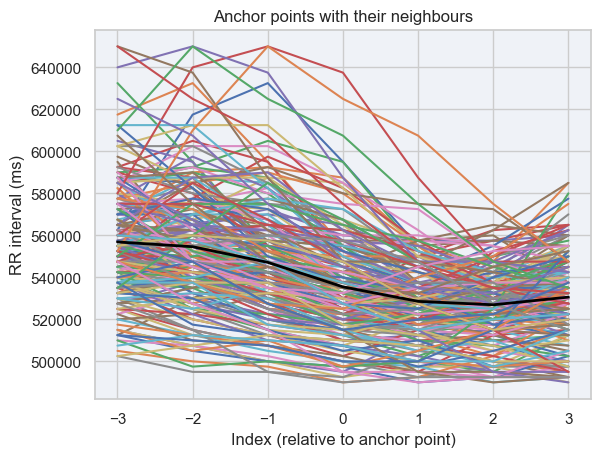

In [18]:
data_plot.plot_all_anchors_with_neighbours(dc_anchors_neighbours, prsa_dc*1000, 3)